In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv')
df.head()
df=df.astype('str')
type(df)

pandas.core.frame.DataFrame

In [37]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    df[i]=le.fit_transform(df[i])

In [39]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [40]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [ ]:
#veil-type column is showing only 0 values.So it can be dropped

In [ ]:
df.drop('veil-type',axis=1,inplace=True)

In [41]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
#there are no null values in this dataset

In [42]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [ ]:
#median is greater than mean for cap surface,odor,gill attachment,gill colour etc,that means they are left skewed datas
#there is some difference between 75% and maximum for odor,gill color,habitat etc..so there are chances for presence of outliers

<AxesSubplot:>

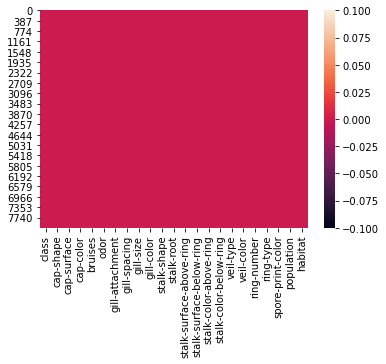

In [44]:
sns.heatmap(df.isnull())

<AxesSubplot:>

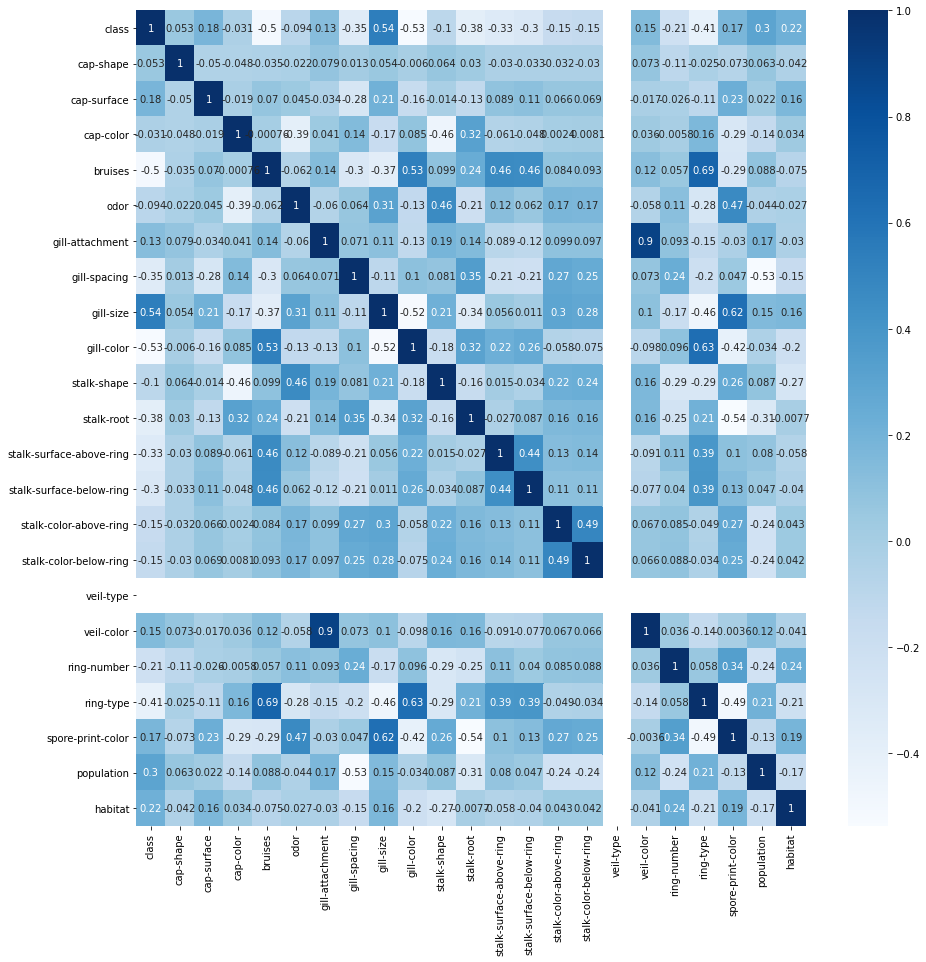

In [48]:
dfcor=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(dfcor,cmap='Blues',annot=True)

In [ ]:
#class is having a strong negative relation with ring type,gill colour and bruises

In [74]:
collist=df.columns.values
ncol=22
nrows=8

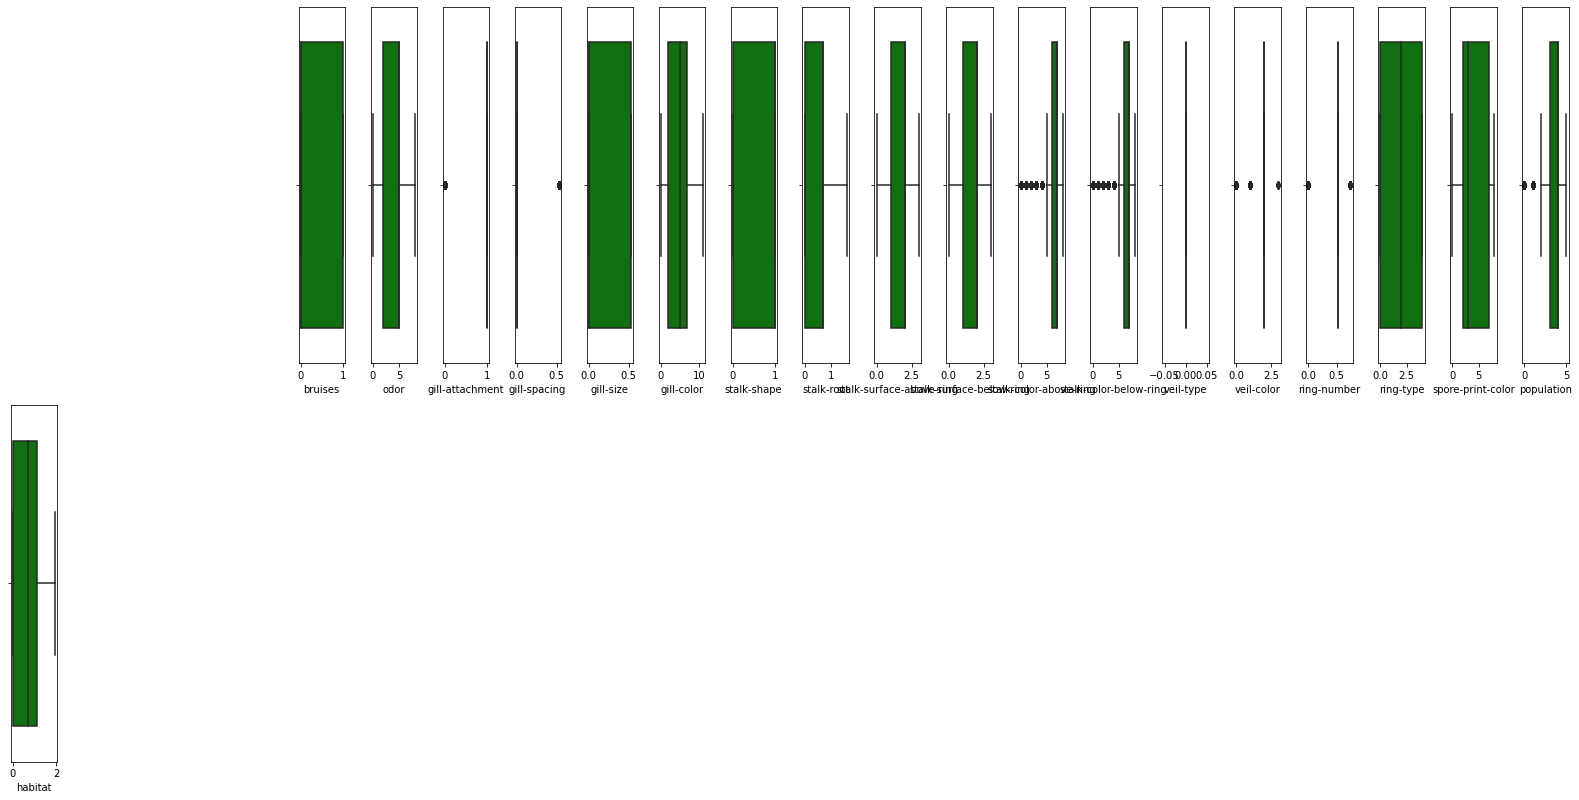

In [75]:
plt.figure(figsize=(ncol,2*ncol))
for i in range(4,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [55]:
df.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-type                   0.000000
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

In [ ]:
#gill attachment,veil color,ring number are highly skewed datas

In [65]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

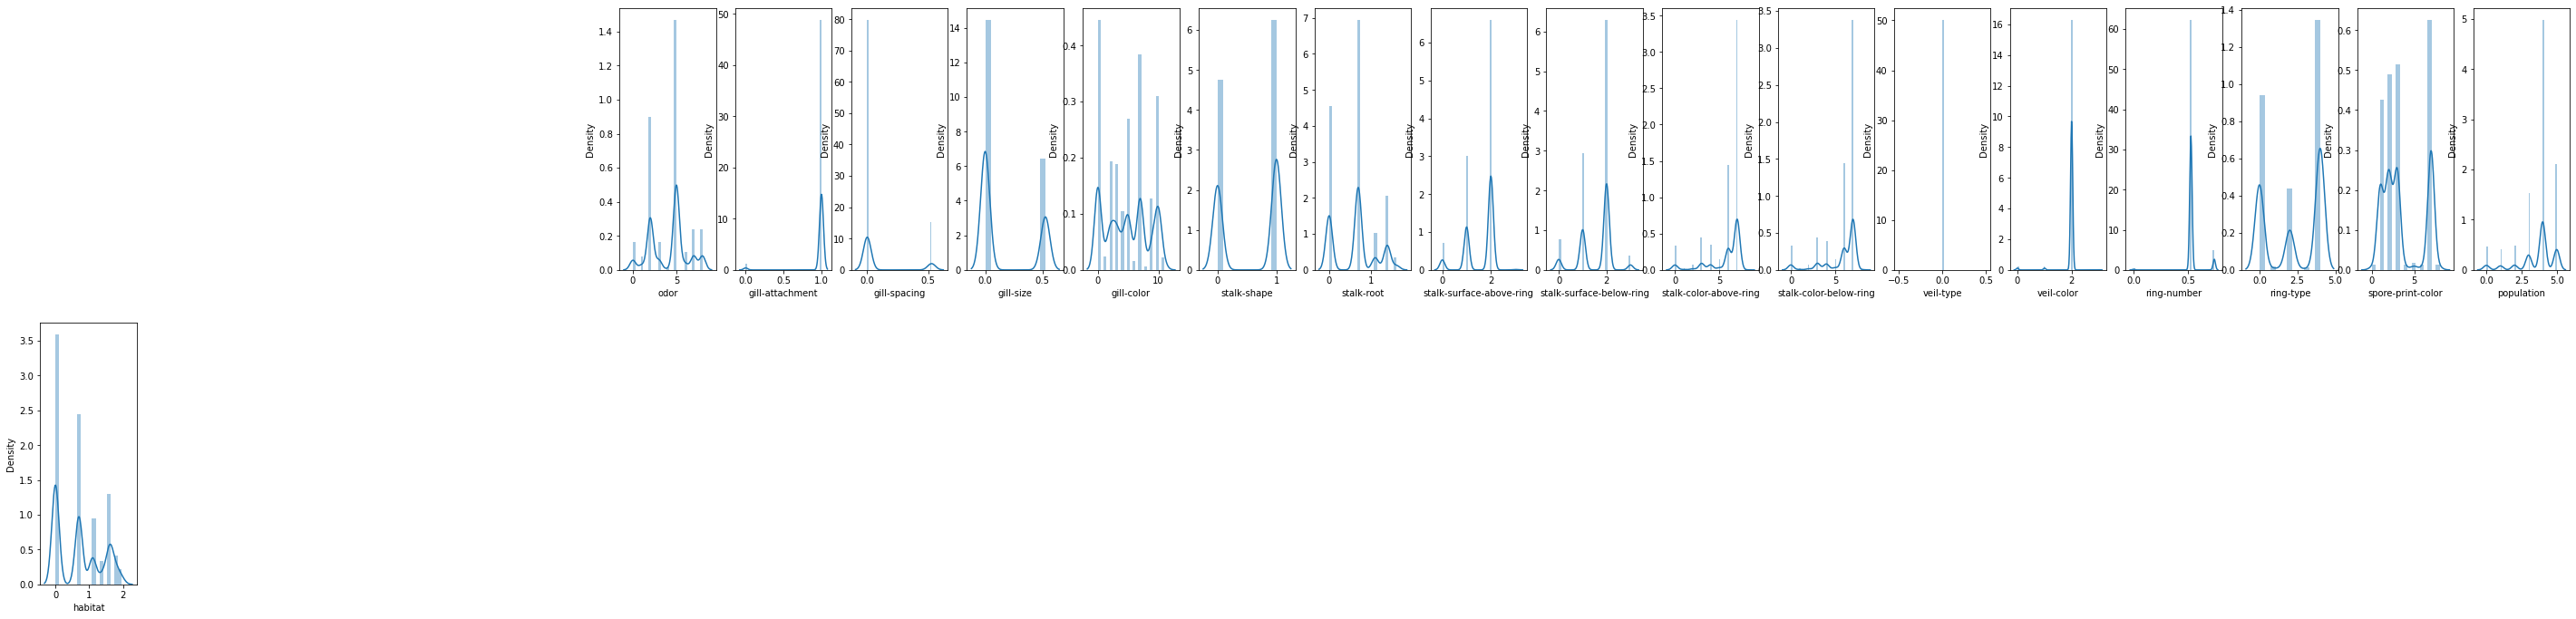

In [76]:
plt.figure(figsize=(50,50))
for i in range(5,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

In [79]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.0366127 , 1.02971224, 0.14012794, ..., 0.67019486, 0.5143892 ,
        1.66538931],
       [0.96468045, 1.02971224, 0.14012794, ..., 0.2504706 , 1.31310821,
        0.00952861],
       [0.96468045, 2.08704716, 0.14012794, ..., 0.2504706 , 1.31310821,
        1.04722694],
       ...,
       [0.96468045, 0.8403434 , 0.14012794, ..., 1.50964337, 2.11182722,
        0.60863376],
       [1.0366127 , 0.21699152, 0.95327039, ..., 1.42842641, 0.28432981,
        0.60863376],
       [0.96468045, 1.02971224, 0.14012794, ..., 0.16925365, 2.11182722,
        0.60863376]])

In [80]:
threshold=3
print(np.where(z>3))

(array([1816, 2128, 2128, ..., 8121, 8123, 8123], dtype=int64), array([15, 14, 15, ..., 17,  6, 17], dtype=int64))


In [82]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)


(8124, 23)
(0, 23)


In [ ]:
#nearly 2000 rows are deleted due to presence of outliers

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [87]:
x=df.iloc[:,1:]
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,1.609438,1,6,1,0.000000,0.526589,4,0,...,2,7,7,0,2,0.526589,4,2,3,1.791759
1,5,2,2.302585,1,0,1,0.000000,0.000000,4,0,...,2,7,7,0,2,0.526589,4,3,2,0.693147
2,0,2,2.197225,1,3,1,0.000000,0.000000,5,0,...,2,7,7,0,2,0.526589,4,3,2,1.386294
3,5,3,2.197225,1,6,1,0.000000,0.526589,5,0,...,2,7,7,0,2,0.526589,4,2,3,1.791759
4,5,2,1.386294,0,5,1,0.526589,0.000000,4,1,...,2,7,7,0,2,0.526589,0,3,0,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,1.609438,0,5,0,0.000000,0.000000,11,0,...,2,5,5,0,1,0.526589,4,0,1,1.098612
8120,5,2,1.609438,0,5,0,0.000000,0.000000,11,0,...,2,5,5,0,0,0.526589,4,0,4,1.098612
8121,2,2,1.609438,0,5,0,0.000000,0.000000,5,0,...,2,5,5,0,1,0.526589,4,0,1,1.098612
8122,3,3,1.609438,0,8,1,0.000000,0.526589,0,1,...,1,7,7,0,2,0.526589,0,7,4,1.098612


In [89]:
y=df.iloc[:,0]
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

In [90]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.02971224,  0.14012794,  0.02432626, ..., -0.67019486,
        -0.5143892 ,  1.66538931],
       [ 1.02971224,  0.14012794,  1.48137145, ..., -0.2504706 ,
        -1.31310821, -0.00952861],
       [-2.08704716,  0.14012794,  1.25989607, ..., -0.2504706 ,
        -1.31310821,  1.04722694],
       ...,
       [-0.8403434 ,  0.14012794,  0.02432626, ..., -1.50964337,
        -2.11182722,  0.60863376],
       [-0.21699152,  0.95327039,  0.02432626, ...,  1.42842641,
         0.28432981,  0.60863376],
       [ 1.02971224,  0.14012794,  0.02432626, ...,  0.16925365,
        -2.11182722,  0.60863376]])

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)


In [94]:
lr=LogisticRegression()

In [95]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.9463087248322147
[[878  51]
 [ 45 814]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       929
           1       0.94      0.95      0.94       859

    accuracy                           0.95      1788
   macro avg       0.95      0.95      0.95      1788
weighted avg       0.95      0.95      0.95      1788



In [96]:
#AUC-ROC CURVE
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [97]:
y_pred_prob=lr.predict_proba(x_test)[:,1]
y_pred_prob

array([5.12630287e-09, 9.23358830e-01, 9.99994750e-01, ...,
       4.47244130e-01, 9.61878152e-01, 3.75901905e-02])

In [98]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [99]:
fpr

array([0.        , 0.        , 0.        , 0.00215285, 0.00215285,
       0.00322928, 0.00322928, 0.00430571, 0.00430571, 0.00538213,
       0.00538213, 0.00645856, 0.00645856, 0.00753498, 0.00753498,
       0.00861141, 0.00861141, 0.00968784, 0.00968784, 0.01076426,
       0.01076426, 0.01184069, 0.01184069, 0.01291712, 0.01291712,
       0.01399354, 0.01399354, 0.01506997, 0.01506997, 0.01614639,
       0.01614639, 0.01722282, 0.01722282, 0.01829925, 0.01829925,
       0.01937567, 0.01937567, 0.0204521 , 0.0204521 , 0.02152853,
       0.02152853, 0.02260495, 0.02260495, 0.02368138, 0.02368138,
       0.02583423, 0.02583423, 0.02691066, 0.02691066, 0.02798708,
       0.02798708, 0.02906351, 0.02906351, 0.03013994, 0.03013994,
       0.03121636, 0.03121636, 0.03229279, 0.03229279, 0.03444564,
       0.03444564, 0.03659849, 0.03659849, 0.03767492, 0.03767492,
       0.03875135, 0.03875135, 0.0409042 , 0.0409042 , 0.04198062,
       0.04198062, 0.04413348, 0.04413348, 0.0452099 , 0.04520

In [100]:
tpr

array([0.        , 0.00116414, 0.32945285, 0.32945285, 0.33178114,
       0.33178114, 0.33527357, 0.33527357, 0.33876601, 0.33876601,
       0.33993015, 0.33993015, 0.35389988, 0.35389988, 0.35972061,
       0.35972061, 0.3701979 , 0.3701979 , 0.3806752 , 0.3806752 ,
       0.53434226, 0.53434226, 0.63445867, 0.63445867, 0.66705471,
       0.66705471, 0.68335274, 0.68335274, 0.74388824, 0.74388824,
       0.75203725, 0.75203725, 0.76018626, 0.76018626, 0.76717113,
       0.76717113, 0.77997672, 0.77997672, 0.79394645, 0.79394645,
       0.80791618, 0.80791618, 0.81140861, 0.81140861, 0.81257276,
       0.81257276, 0.82770664, 0.82770664, 0.83236321, 0.83236321,
       0.83352736, 0.83352736, 0.83585565, 0.83585565, 0.83701979,
       0.83701979, 0.84051222, 0.84051222, 0.84400466, 0.84400466,
       0.85448196, 0.85448196, 0.86379511, 0.86379511, 0.86495925,
       0.86495925, 0.87077998, 0.87077998, 0.87194412, 0.87194412,
       0.87427241, 0.87427241, 0.87892899, 0.87892899, 0.88242

In [101]:
thresholds

array([1.99999804e+00, 9.99998042e-01, 9.96533002e-01, 9.95773966e-01,
       9.95556204e-01, 9.94995955e-01, 9.94493916e-01, 9.94434211e-01,
       9.93920859e-01, 9.93912030e-01, 9.93855686e-01, 9.93854979e-01,
       9.91779056e-01, 9.91676677e-01, 9.91187412e-01, 9.91162822e-01,
       9.90333012e-01, 9.90246475e-01, 9.89336972e-01, 9.89295544e-01,
       9.68522952e-01, 9.67920490e-01, 9.51747402e-01, 9.51683716e-01,
       9.43055299e-01, 9.42841386e-01, 9.37589384e-01, 9.37231791e-01,
       9.16537785e-01, 9.15856725e-01, 9.11374476e-01, 9.10597166e-01,
       9.08075783e-01, 9.07857646e-01, 9.03872747e-01, 9.03099095e-01,
       8.98241427e-01, 8.97700023e-01, 8.89800652e-01, 8.89389765e-01,
       8.80649969e-01, 8.78875339e-01, 8.75616424e-01, 8.75483743e-01,
       8.75342669e-01, 8.73943291e-01, 8.63220511e-01, 8.62557666e-01,
       8.59405983e-01, 8.59322712e-01, 8.58166411e-01, 8.58100933e-01,
       8.57168020e-01, 8.56725318e-01, 8.55674392e-01, 8.55261754e-01,
      

<function matplotlib.pyplot.show(close=None, block=None)>

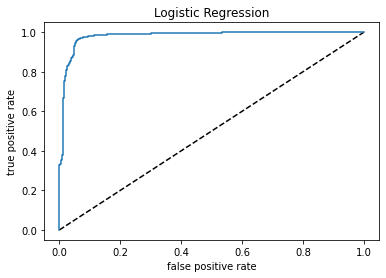

In [102]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Logistic Regression')
plt.show

In [103]:
auc_score=roc_auc_score(y_test,lr.predict(x_test))
print(auc_score)

0.9463578822848308


In [104]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.9373601789709173
[[883  46]
 [ 66 793]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       929
           1       0.95      0.92      0.93       859

    accuracy                           0.94      1788
   macro avg       0.94      0.94      0.94      1788
weighted avg       0.94      0.94      0.94      1788



In [105]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

1.0
[[929   0]
 [  0 859]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       929
           1       1.00      1.00      1.00       859

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



In [106]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

1.0
[[929   0]
 [  0 859]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       929
           1       1.00      1.00      1.00       859

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



In [107]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

1.0
[[929   0]
 [  0 859]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       929
           1       1.00      1.00      1.00       859

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



<function matplotlib.pyplot.show(close=None, block=None)>

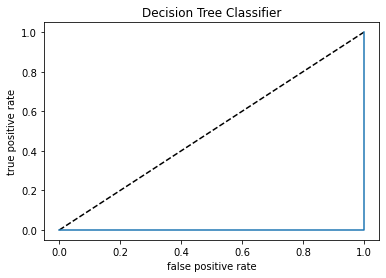

In [108]:
#Decision tree curve
y_pred_prob=dtc.predict_proba(x_test)[:,0]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Decision Tree Classifier')
plt.show

In [109]:
auc_score=roc_auc_score(y_test,lr.predict(x_test))
print(auc_score)

0.9463578822848308


In [110]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

1.0
[[929   0]
 [  0 859]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       929
           1       1.00      1.00      1.00       859

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



In [112]:
from sklearn.model_selection import cross_val_score


In [113]:
lrscores=cross_val_score(lr,x,y,cv=5)
print(lrscores)
print(lrscores.mean(),lrscores.std())

[0.656      0.98215385 0.87569231 0.99876923 0.51970443]
0.8064639636225841 0.18842040584044178


In [114]:
gnbscores=cross_val_score(gnb,x,y,cv=5)
print(gnbscores)
print(gnbscores.mean(),gnbscores.std())

[0.71076923 0.95569231 0.80184615 0.71015385 0.49445813]
0.7345839333080713 0.1498248918484023


In [115]:
svcscores=cross_val_score(svc,x,y,cv=5)
print(svcscores)
print(svcscores.mean(),svcscores.std())

[0.84246154 1.         0.96923077 1.         0.60529557]
0.8833975748389541 0.1507156756820342


In [116]:
dtcscores=cross_val_score(dtc,x,y,cv=5)
print(dtcscores)
print(dtcscores.mean(),dtcscores.std())

[0.92123077 1.         0.99261538 1.         0.68472906]
0.9197150435771126 0.12118293294247129


In [117]:
knnscores=cross_val_score(knn,x,y,cv=5)
print(knnscores)
print(knnscores.mean(),knnscores.std())

[0.84246154 1.         0.95446154 1.         0.5979064 ]
0.8789658961727929 0.1518717267226976


In [118]:
import joblib
joblib.dump(dtc,'dtc_mushroom.pkl')

['dtc_mushroom.pkl']